# Iteration test
This file demonstrates how to initialize an Equilibrium object from leading order quantities and tests its accuracy.

In [1]:
# This file implements and tests recursion relations
from matplotlib import pyplot as plt
import sys
sys.path.insert(1,'../')
from aqsc import *

import time

## Initializing an `Equilibrium`
### Required quantities and orders
Unknowns:

1. X_coef_cp: 2
2. Y_coef_cp: 2
3. Z_coef_cp: 2
4. B_psi_coef_cp: 0
5. B_theta_coef_cp: 2
6. iota_coef: 0
7. Delta_coef_cp: 3
8. p_perp_coef_cp: 3

Known constants:
1. B_denom_coef_c: 2
2. B_alpha_coef: 1
3. kap_p
4. dl_p 
5. tau_p
6. eta

## Iterate 2 orders using only the magentic equations

In [2]:
equilibrium_init = circular_axis()

det (10348167.01692112-67205.77356180361j)


Configuration has 1.0 field periods.
Axis shape:


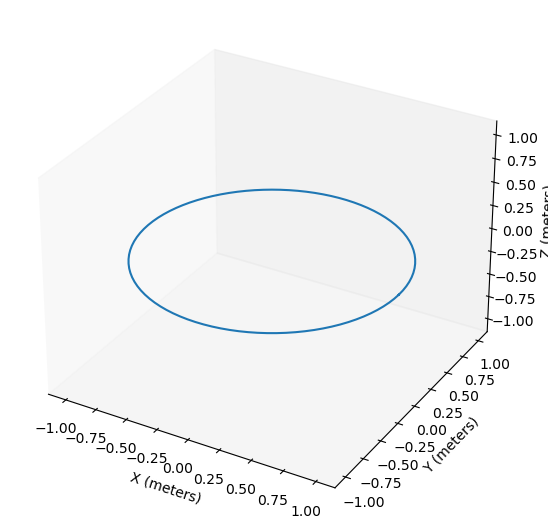

Evaluating order 3 4


2023-05-23 12:08:09.358974: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module jit__lambda_] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-05-23 12:21:49.786931: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 15m40.429485s

********************************
[Compiling module jit__lambda_] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-05-23 12:27:13.798015: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2m14.209704s

********************************
[Compiling module jit_eval_loop] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to

In [9]:
debug_path = '../test_data_eduardo/'

B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )

equilibrium_new = iterate_2(
    equilibrium_init,
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
    iota_new=iota_coef[1],
    max_freq=(20, 20)
)

## Accessing data and checking accuracy

X_coef_cp n = 2


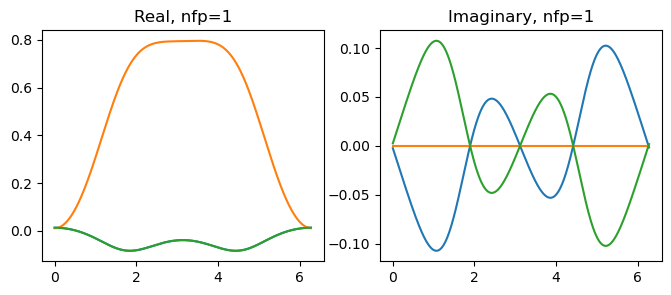

Y_coef_cp n = 2


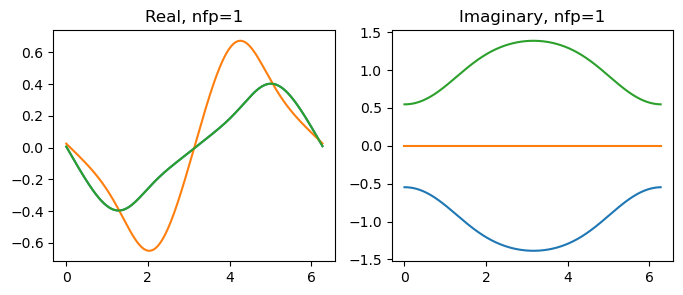

Z_coef_cp n = 2


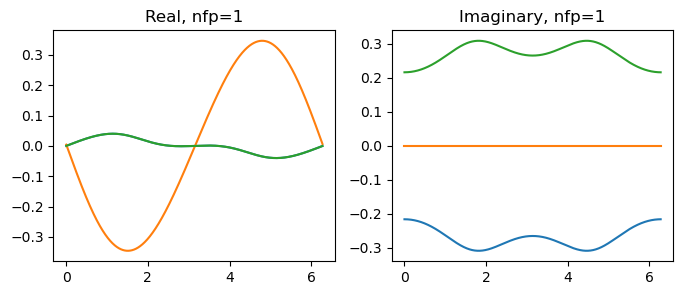

B_psi_coef_cp n = 0


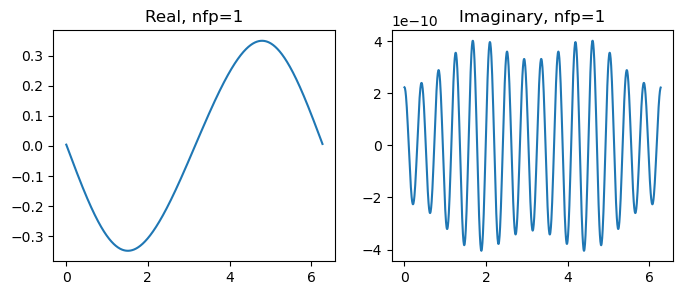

B_theta_coef_cp n = 2


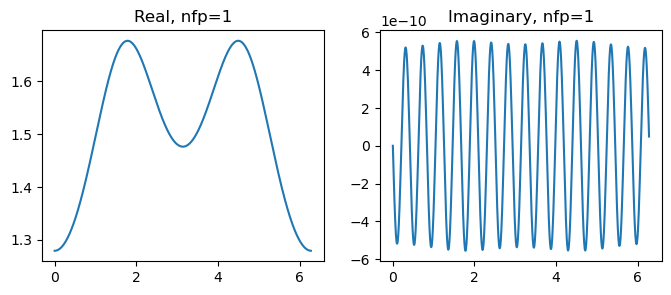

p_perp_coef_cp n = 2


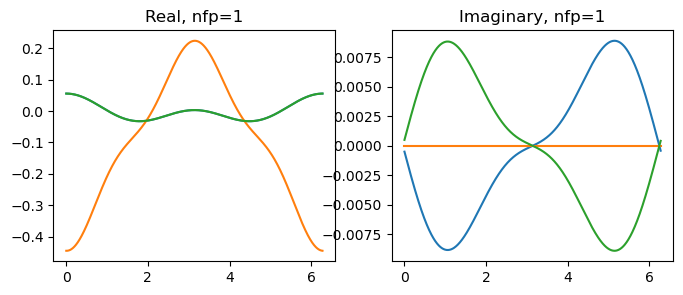

Delta_coef_cp n = 2


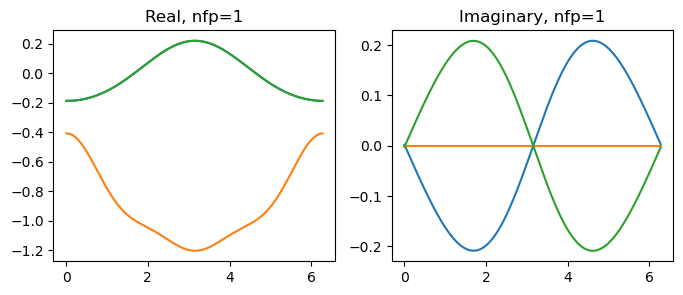

In [3]:
equilibrium_init.display_order(2)

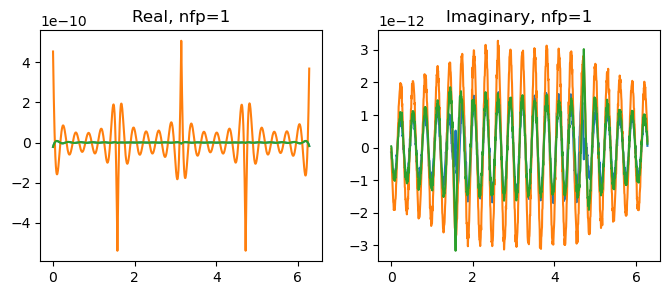

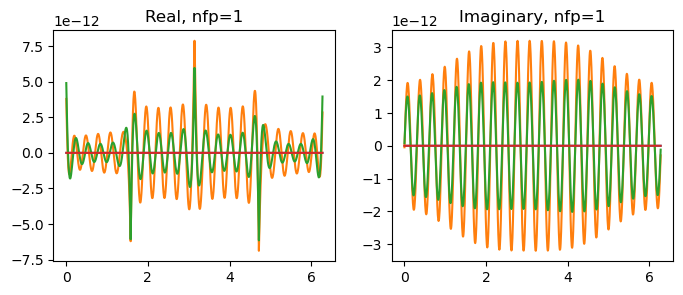

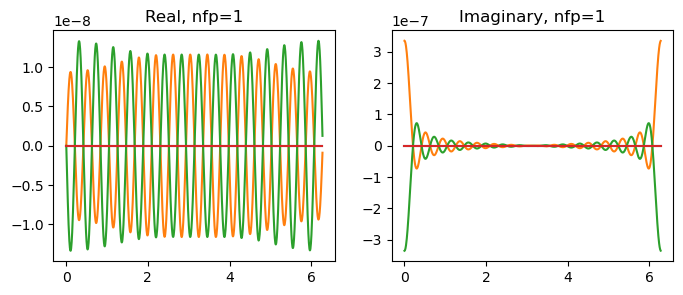

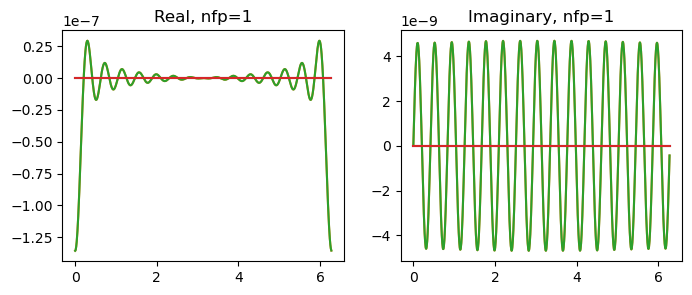

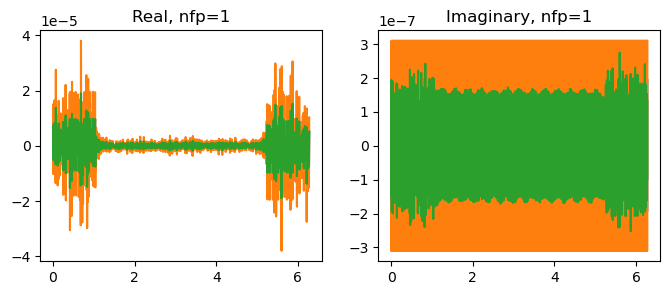

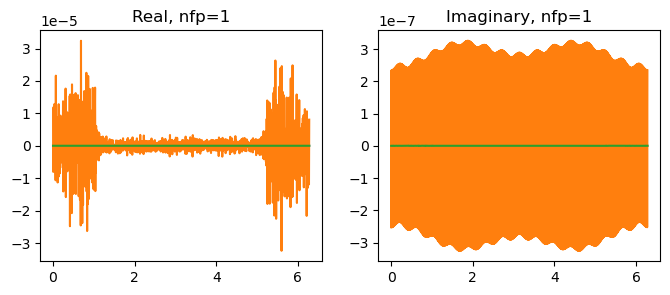

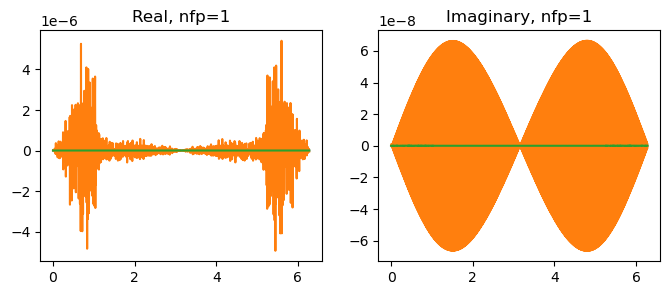

In [6]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium_init.check_governing_equations(2)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()


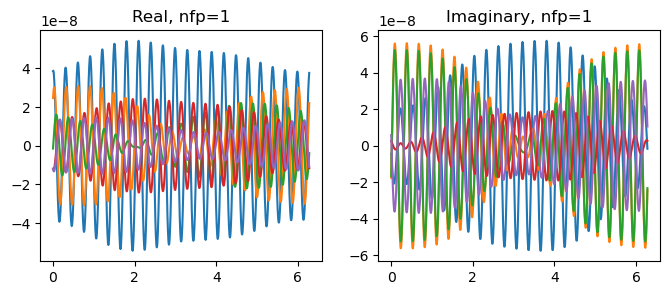

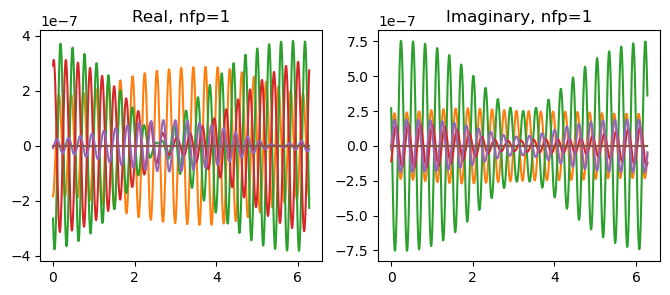

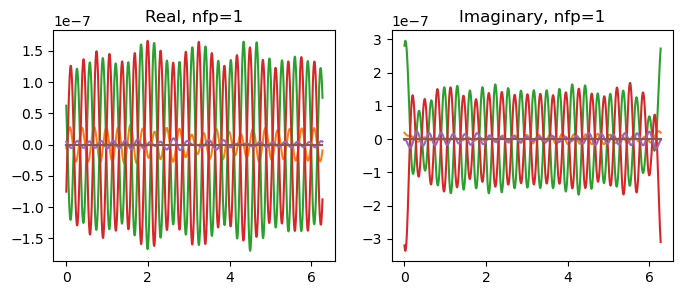

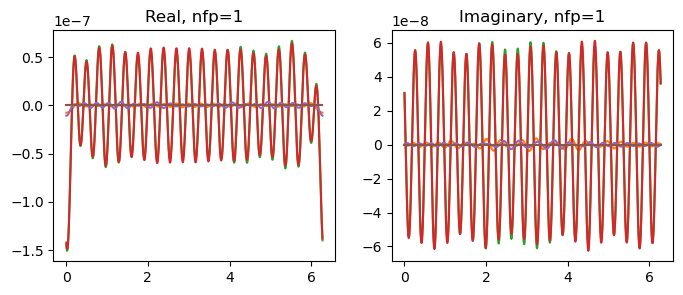

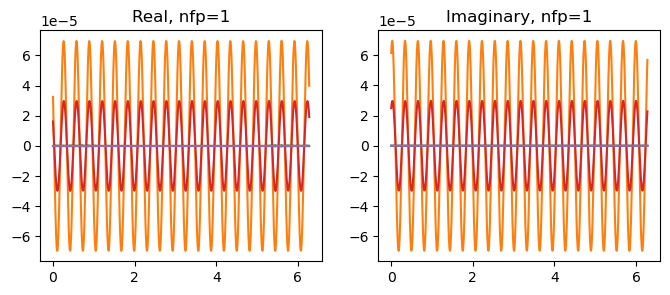

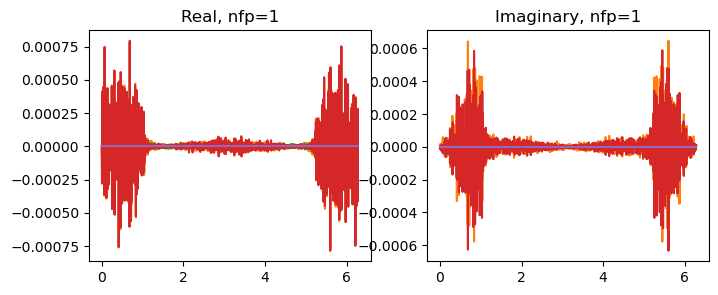

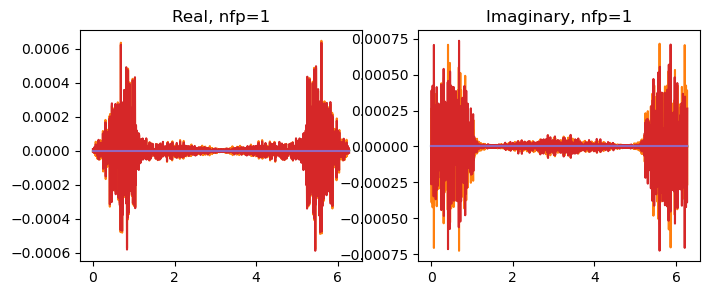

In [10]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium_new.check_governing_equations(4)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()
